In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First of all, we get the data from csv file. (expected return and covariance matrix)

In [24]:
Eret = pd.read_csv("expected_return.csv").values
covariance = pd.read_csv("covariance_matrix.csv").values

This is the class of each particle which has it's position, best position and also velocity which is randomly difined at first.

In [25]:
class particle:
    def __init__(self, arr, vel):
        self.pos = np.array(arr)
        self.best_pos = self.pos
        self.velocity = np.array(vel)

This is the check function which map each array to another array which it's some is equal to 1 and all of it's elements are non-negative

In [26]:
def check(arr):
    arr_sum = sum(arr)
    normalized_arr = [max(0, float(element) / arr_sum) for element in arr]
    new_sum = sum(normalized_arr)
    normalized_arr = [element / new_sum for element in normalized_arr]
    
    return np.array(normalized_arr)

We are looking to minimize the function:

$$ x^TCx - \beta x^T\mu$$

which $x^T$ is x array, C is the covariance matrix and $\mu$ is the Eret.

In [27]:
def cost(x, beta):
    return x@covariance@np.transpose(x) - beta*(x*Eret).sum()

This is the main algorithm
>first of all, we create the initial population and check for the right array and calculates their costs.

>Then we pick the best particle up.

>After that, for iteration times for each particle, we update it's velocity and for sure, the position

>And also update the best particle

we update the velocity due to global best and personal best and also the velocity itself. Then update the position using the calculated velocity.

In [28]:
def PSO(n, iterations, c_1, c_2, w, beta):
    np.random.seed(100)
    
    particles = [particle([np.random.uniform(0, 0.1) for i in range(10)], [np.random.uniform(-0.5, 0.5) for i in range(10)]) for i in range(n)] #part A
    
    for i in range(n):
        particles[i].pos = check(particles[i].pos)
    
    costs = [cost(particles[i].pos, beta) for i in range(n)]
    
    minimum = 1000
    min_i = 0
    for i in range(n):
        if (minimum > costs[i]):
            minimum = costs[i]
            min_i = i
            
    best_global_index = min_i
    best_fitness = minimum
    best_final = particles[best_global_index].pos
    
    best = []
    
    for it in range(iterations):
        for i in range(n):
            particles[i].velocity = w*particles[i].velocity + c_1*np.random.rand(1)*(particles[best_global_index].best_pos - particles[i].pos) + c_2*np.random.rand(1)*(particles[i].best_pos - particles[i].pos)
            
            particles[i].pos = particles[i].pos + particles[i].velocity
                
            particles[i].pos = check(particles[i].pos)
            
            if (cost(particles[i].pos, beta) < cost(particles[i].best_pos, beta)):
                particles[i].best_pos = particles[i].pos
                
            if (cost(particles[i].pos, beta) < cost(particles[best_global_index].best_pos, beta)):
                best_global_index = i
            
            if (cost(particles[i].pos, beta) < minimum):
                best_final = particles[best_global_index].pos
                minimum = cost(particles[best_global_index].pos, beta)
                
        best.append(cost(particles[best_global_index].best_pos, beta))
    return best, best_final

As we can see, it has a smooth plot. Which tells us that the algorithms is probably working fine.

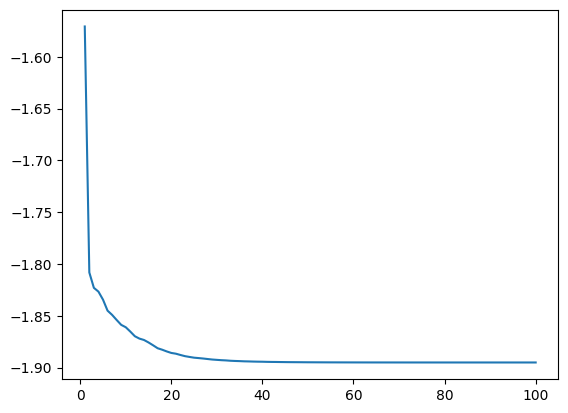

In [29]:
arr, pos = PSO(1000, 100, 0.3, 0.9, 0.5, 100)
ite = [i+1 for i in range(100)]
plt.plot(ite, arr)
plt.show()

This array tells us how much to buy from each crypto

In [30]:
pos

array([0.05137971, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.94862029, 0.        , 0.        ])

This is the return

In [31]:
(pos*Eret).sum()

0.019048166416869627

And the risk

In [32]:
pos@covariance@np.transpose(pos)

0.009682896059103082